In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, validation_curve, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Chargement des données
print("📊 Chargement des données...")
file_path = "C:/Users/Massi/Desktop/MSPR BLOC 03/les_jointeurs/datasets/jointeur_elections_population/Dataset_Finale_MSPR_2025.csv"
data = pd.read_csv(file_path, sep=';')
print(f"Dataset complet: {data.shape[0]} lignes")

📊 Chargement des données...
Dataset complet: 69060 lignes


C:\Users\Massi\AppData\Local\Temp\ipykernel_10432\3872266114.py:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=';')


In [36]:

# 🗺️ Filtrage sur la région Bretagne
bretagne_depts = ['22', '29', '35', '56']
data['code_dept'] = data['commune_id'].astype(str).str[:2]
data_region = data[data['code_dept'].isin(bretagne_depts)].copy()

print(f"📍 Région sélectionnée : Bretagne ({', '.join(bretagne_depts)})")
print(f"✅ Nombre de communes : {data_region.shape[0]}")

# 🎯 Vérification des classes
print("\nClasses d'orientation politique :")
print(data_region['orientation_politique'].value_counts().sort_index())

📍 Région sélectionnée : Bretagne (22, 29, 35, 56)
✅ Nombre de communes : 2412

Classes d'orientation politique :
orientation_politique
0.0     176
2.0    1733
3.0     121
4.0     382
Name: count, dtype: int64


In [37]:

# 🔧 Nettoyage des données
data_region = data_region.dropna(subset=['orientation_politique'])

# 📋 Sélection des variables (features)
features_selected = [
    'nb_inscrits',
    'nb_abstentions',
    'pct_population_jeune',
    'pct_population_sans_activite',
    'pct_population_etrangere',
    'taux_chomage_pct',
    'nb_population_active',
    'Population_Totale',
    'nb_crimes'
]
X = data_region[features_selected].copy()
y = data_region['orientation_politique'].copy()

In [38]:

# 📦 Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 📏 Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:

# 🌲 Entraînement Random Forest avec class_weight='balanced'
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',  # Pour gérer le déséquilibre des classes
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [40]:

# 🎯 Prédictions et évaluation
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🏆 Accuracy : {accuracy:.4f} ({accuracy*100:.2f}%)")
print("\n📊 Rapport de classification :")
print(classification_report(y_test, y_pred))


🏆 Accuracy : 0.7039 (70.39%)

📊 Rapport de classification :
              precision    recall  f1-score   support

         0.0       0.32      0.31      0.32        35
         2.0       0.79      0.88      0.83       347
         3.0       0.22      0.08      0.12        24
         4.0       0.42      0.29      0.34        77

    accuracy                           0.70       483
   macro avg       0.44      0.39      0.40       483
weighted avg       0.67      0.70      0.68       483




📈 Calcul des courbes d'apprentissage...


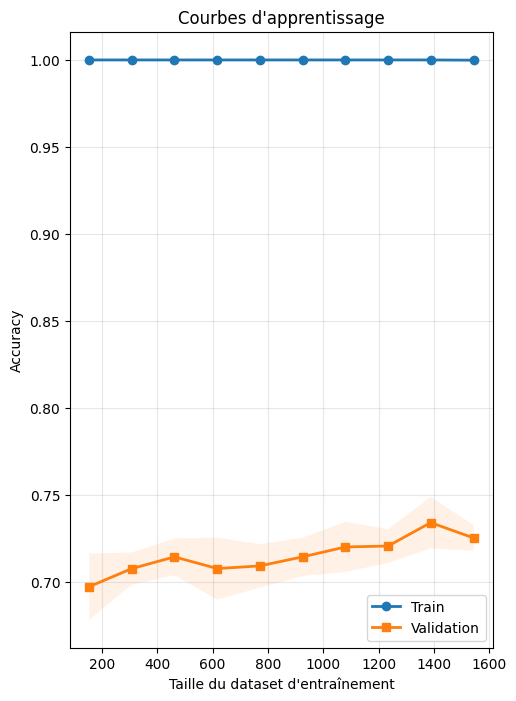

In [41]:

# 📈 COURBES D'APPRENTISSAGE
print("\n📈 Calcul des courbes d'apprentissage...")
train_sizes, train_scores, val_scores = learning_curve(
    RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    X_train_scaled, y_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
    random_state=42
)
# Calcul des moyennes et écarts-types
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(12, 8))
# Courbe d'apprentissage
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_mean, label='Train', linewidth=2, marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, label='Validation', linewidth=2, marker='s')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Taille du dataset d\'entraînement')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Courbes d\'apprentissage')
plt.grid(True, alpha=0.3)

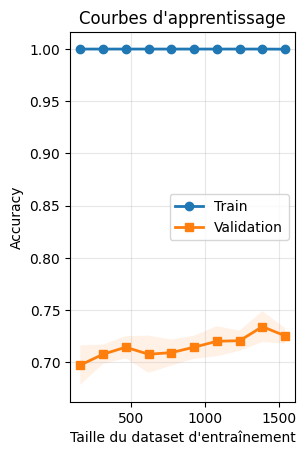

In [42]:

# Courbe d'apprentissage
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_mean, label='Train', linewidth=2, marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, label='Validation', linewidth=2, marker='s')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Taille du dataset d\'entraînement')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Courbes d\'apprentissage')
plt.grid(True, alpha=0.3)

📊 Calcul de la courbe de validation...


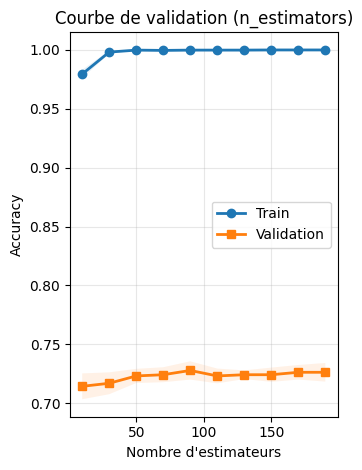

In [43]:

# 📊 COURBE DE VALIDATION (hyperparamètre n_estimators)
print("📊 Calcul de la courbe de validation...")
n_estimators_range = range(10, 201, 20)
train_scores_val, val_scores_val = validation_curve(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    X_train_scaled, y_train,
    param_name='n_estimators',
    param_range=n_estimators_range,
    cv=5,
    n_jobs=-1
)

train_mean_val = np.mean(train_scores_val, axis=1)
train_std_val = np.std(train_scores_val, axis=1)
val_mean_val = np.mean(val_scores_val, axis=1)
val_std_val = np.std(val_scores_val, axis=1)

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, train_mean_val, label='Train', linewidth=2, marker='o')
plt.fill_between(n_estimators_range, train_mean_val - train_std_val, 
                 train_mean_val + train_std_val, alpha=0.1)
plt.plot(n_estimators_range, val_mean_val, label='Validation', linewidth=2, marker='s')
plt.fill_between(n_estimators_range, val_mean_val - val_std_val, 
                 val_mean_val + val_std_val, alpha=0.1)
plt.xlabel('Nombre d\'estimateurs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Courbe de validation (n_estimators)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

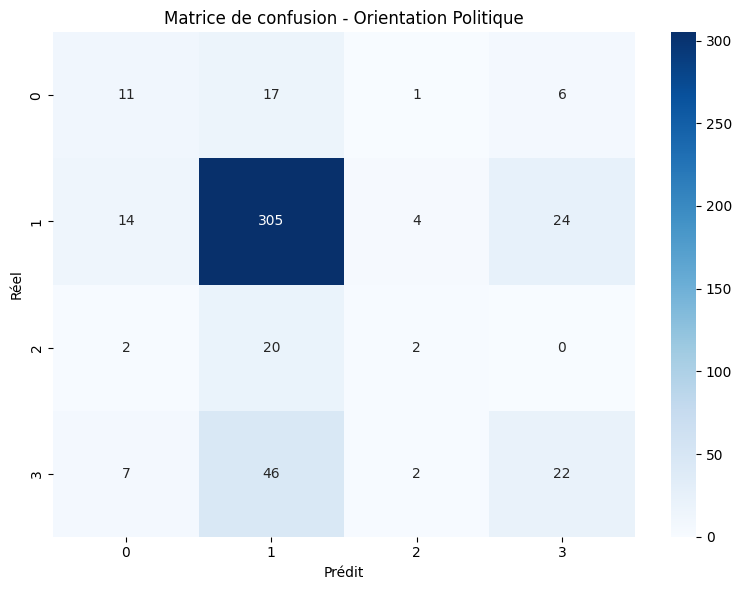

In [44]:

# 🔲 Matrice de confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Orientation Politique")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()


🔍 Importance des features :
pct_population_etrangere       : 0.1332
nb_inscrits                    : 0.1278
pct_population_jeune           : 0.1275
pct_population_sans_activite   : 0.1222
nb_abstentions                 : 0.1200
Population_Totale              : 0.1128
nb_population_active           : 0.1105
taux_chomage_pct               : 0.1060
nb_crimes                      : 0.0399


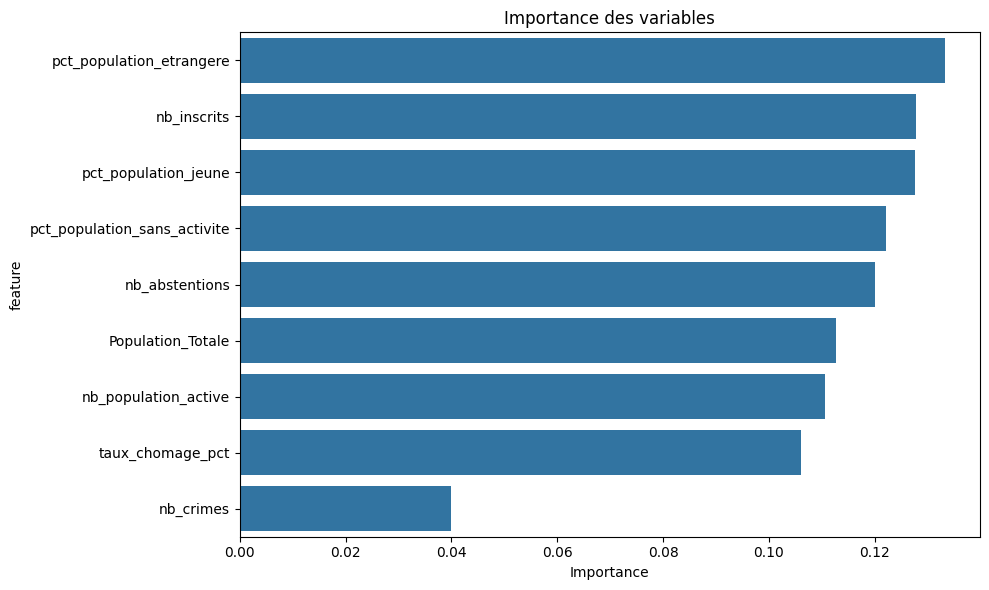

In [45]:

# 🔍 Importance des features
feature_importance = pd.DataFrame({
    'feature': features_selected,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

print("\n🔍 Importance des features :")
for i, row in feature_importance.iterrows():
    print(f"{row['feature']:<30} : {row['importance']:.4f}")

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title("Importance des variables")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

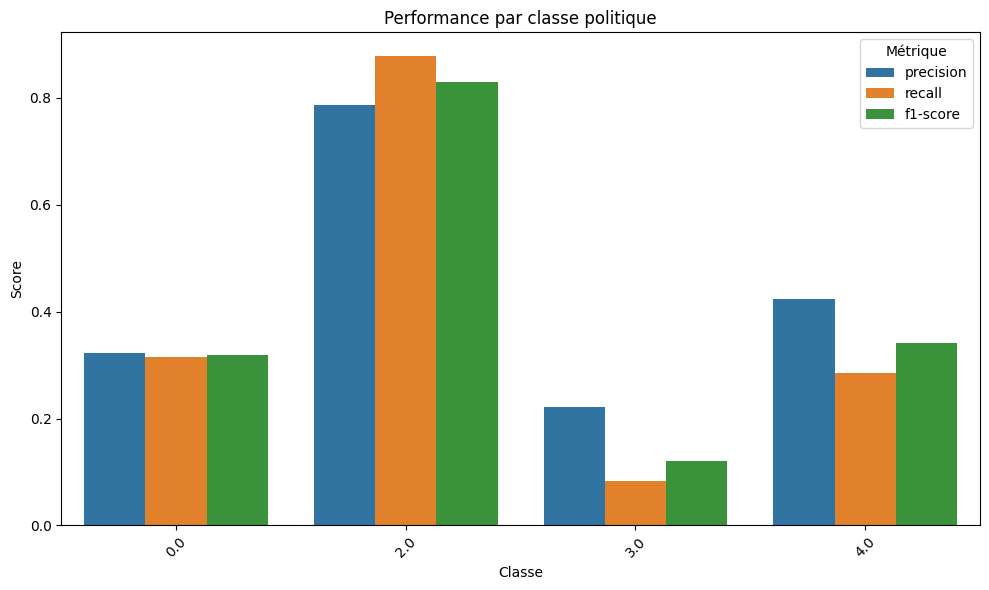

In [46]:

# 📊 Performance par classe
plt.figure(figsize=(10, 6))
report_dict = classification_report(y_test, y_pred, output_dict=True)
classes = [k for k in report_dict.keys() if k not in ['accuracy', 'macro avg', 'weighted avg']]
metrics = ['precision', 'recall', 'f1-score']

performance_data = []
for classe in classes:
    for metric in metrics:
        performance_data.append({
            'Classe': classe,
            'Métrique': metric,
            'Score': report_dict[classe][metric]
        })

performance_df = pd.DataFrame(performance_data)
sns.barplot(data=performance_df, x='Classe', y='Score', hue='Métrique')
plt.title('Performance par classe politique')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:

# 🔮 Fonction de prédiction personnalisée
def predire_orientation(nb_inscrits, nb_abstentions, pct_population_jeune,
                        pct_population_sans_activite, pct_population_etrangere, taux_chomage_pct,
                        nb_population_active, population_totale, nb_crimes):
    new_data = np.array([[nb_inscrits, nb_abstentions, pct_population_jeune,
                          pct_population_sans_activite, pct_population_etrangere, taux_chomage_pct,
                          nb_population_active, population_totale, nb_crimes]])
    new_data_scaled = scaler.transform(new_data)
    prediction = rf_model.predict(new_data_scaled)[0]
    proba = rf_model.predict_proba(new_data_scaled)[0]
    return prediction, proba

In [48]:
# 📝 Résumé
print("\n🎉 RÉSUMÉ FINAL :")
print(f"📍 Région analysée : Bretagne ({', '.join(bretagne_depts)})")
print(f"📊 Communes utilisées : {len(data_region)}")
print(f"🎯 Accuracy obtenue : {accuracy*100:.2f}%")
print(f"🌲 Nombre de features : {len(features_selected)}")
print(f"📈 Courbes générées : Apprentissage + Validation")
print(f"⚖️ Class weight : balanced (pour gérer le déséquilibre)")


🎉 RÉSUMÉ FINAL :
📍 Région analysée : Bretagne (22, 29, 35, 56)
📊 Communes utilisées : 2412
🎯 Accuracy obtenue : 70.39%
🌲 Nombre de features : 9
📈 Courbes générées : Apprentissage + Validation
⚖️ Class weight : balanced (pour gérer le déséquilibre)
